<a href="https://colab.research.google.com/github/IshaanKaul210104/Cat-Vs-Dog-Classification/blob/main/Cat_Vs_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
 import tensorflow as tf
 from tensorflow import keras
 from keras import Sequential
 from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalize
def process(image , label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization()) # Change made to reduce Overfitting.
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization()) # Change made to reduce Overfitting.
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization()) # Change made to reduce Overfitting.
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1)) # Change made to reduce Overfitting.
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1)) # Change made to reduce Overfitting.
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [18]:
history = model.fit(train_ds , epochs = 10 , validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.5535 - loss: 2.9003 - val_accuracy: 0.6544 - val_loss: 0.6446
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6581 - loss: 0.6456 - val_accuracy: 0.7654 - val_loss: 0.5005
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.7578 - loss: 0.4992 - val_accuracy: 0.8008 - val_loss: 0.4396
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8078 - loss: 0.4249 - val_accuracy: 0.8028 - val_loss: 0.4215
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8381 - loss: 0.3694 - val_accuracy: 0.8008 - val_loss: 0.4438
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8732 - loss: 0.3034 - val_accuracy: 0.8030 - val_loss: 0.4651
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9031 - loss: 0.2379 - val_accuracy: 0.7850 - val_loss: 0.5027
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9382 - loss: 0.1599 - 

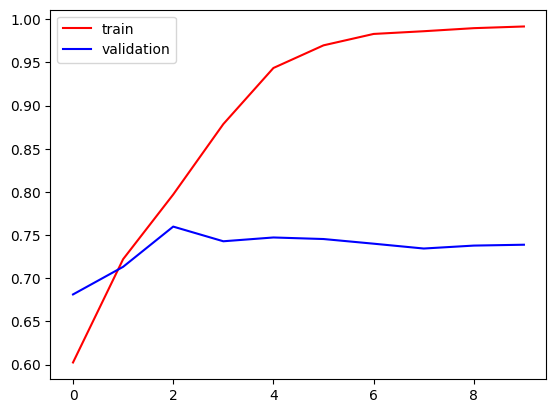

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

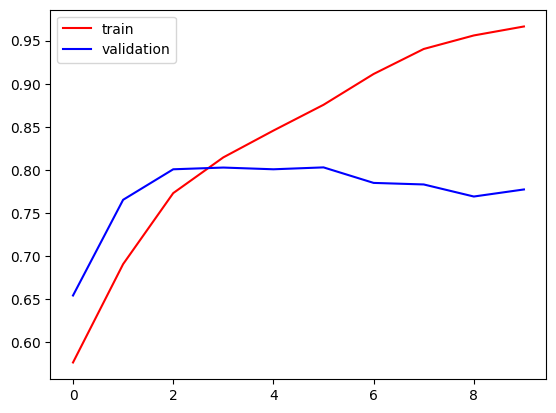

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

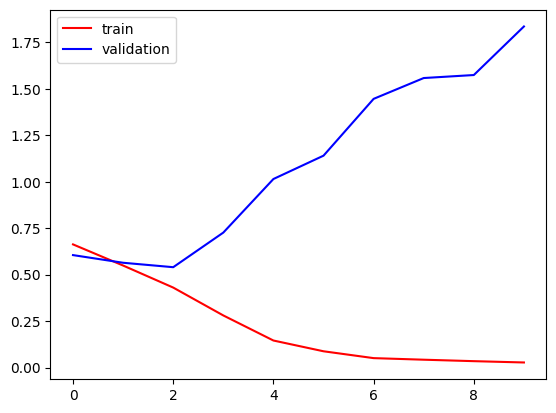

In [13]:
plt.plot(history.history['loss'], color = 'red' , label = 'train')
plt.plot(history.history['val_loss'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

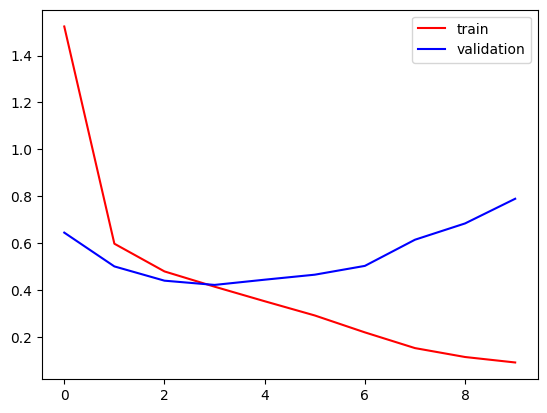

In [20]:
plt.plot(history.history['loss'], color = 'red' , label = 'train')
plt.plot(history.history['val_loss'], color = 'blue' , label = 'validation')
plt.legend()
plt.show()

As we can see , the large gap between the red and the blue line indicates Overfitting . Here are ways to reduce Overfitting.

In [14]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Normalization
# Reduce Complexity

In [50]:
import cv2

In [51]:
test_img = cv2.imread('/content/Cat_Image.webp')

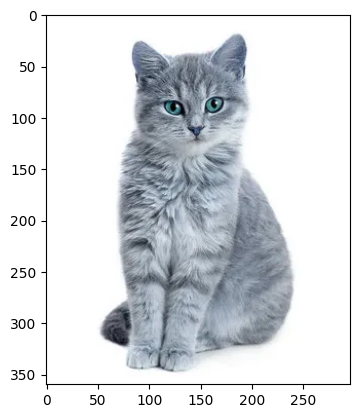

In [52]:
plt.imshow(test_img)

In [53]:
test_img.shape

(360, 296, 3)

In [54]:
test_img = cv2.resize(test_img , (256,256))

In [55]:
test_input = test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.]], dtype=float32)

In [57]:
test_img2 = cv2.imread('/content/Dog_Image.webp')

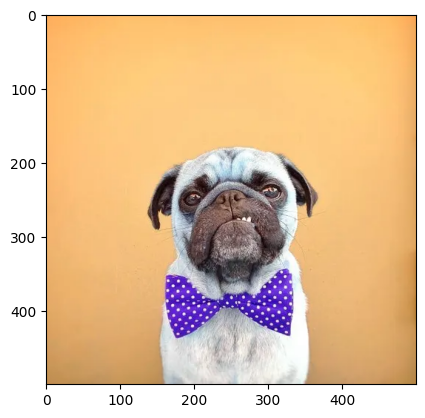

In [58]:
plt.imshow(test_img2)

In [59]:
test_img2.shape

(500, 500, 3)

In [60]:
test_img2 = cv2.resize(test_img2 , (256,256))

In [61]:
test_input = test_img2.reshape((1,256,256,3))

In [62]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)